In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "Qwen2.5-1.5B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   text                                                        3000 non-null   object
 1   label                                                       3000 non-null   object
 2   title                                                       3000 non-null   object
 3   puzzle                                                      3000 non-null   object
 4   truth                                                       3000 non-null   object
 5   Qwen/Qwen2.5-1.5B-Instruct/shots-00                         3000 non-null   object
 6   Qwen/Qwen2.5-1.5B-Instruct/shots-05                         3000 non-null   object
 7   Qwen/Qwen2.5-1.5B-Instruct/shots-10                         3000 non-null   object
 8   Qwen/Qwe

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'Qwen/Qwen2.5-1.5B-Instruct/shots-00',
 'Qwen/Qwen2.5-1.5B-Instruct/shots-05',
 'Qwen/Qwen2.5-1.5B-Instruct/shots-10',
 'Qwen/Qwen2.5-1.5B-Instruct/shots-20',
 'Qwen/Qwen2.5-1.5B-Instruct/shots-30',
 'Qwen/Qwen2.5-1.5B-Instruct/shots-40',
 'Qwen/Qwen2.5-1.5B-Instruct/shots-50',
 'Qwen/Qwen2.5-1.5B-Instruct_torch.float16_lf',
 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-35_torch.float16_lf',
 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-70_torch.float16_lf',
 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-105_torch.float16_lf',
 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-140_torch.float16_lf',
 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-175_torch.float16_lf',
 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-210_torch.float16_lf',
 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-245_torch.float16_lf',
 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-280_torch.float16_lf',
 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-315_torch.float16_lf',
 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-350_torch.float16

In [22]:
perf_df = get_metrics_df(df)
perf_df

columns: ['Qwen/Qwen2.5-1.5B-Instruct_torch.float16_lf', 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-35_torch.float16_lf', 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-70_torch.float16_lf', 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-105_torch.float16_lf', 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-140_torch.float16_lf', 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-175_torch.float16_lf', 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-210_torch.float16_lf', 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-245_torch.float16_lf', 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-280_torch.float16_lf', 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-315_torch.float16_lf', 'Qwen/Qwen2.5-1.5B-Instruct/checkpoint-350_torch.float16_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:478: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                  model  \
0     0.0  Qwen2.5-1.5B-Instruct   
1     0.2  Qwen2.5-1.5B-Instruct   
2     0.4  Qwen2.5-1.5B-Instruct   
3     0.6  Qwen2.5-1.5B-Instruct   
4     0.8  Qwen2.5-1.5B-Instruct   
5     1.0  Qwen2.5-1.5B-Instruct   
6     1.2  Qwen2.5-1.5B-Instruct   
7     1.4  Qwen2.5-1.5B-Instruct   
8     1.6  Qwen2.5-1.5B-Instruct   
9     1.8  Qwen2.5-1.5B-Instruct   
10    2.0  Qwen2.5-1.5B-Instruct   

                                                  run  accuracy  precision  \
0         Qwen/Qwen2.5-1.5B-Instruct_torch.float16_lf  0.199667   0.527996   
1   Qwen/Qwen2.5-1.5B-Instruct/checkpoint-35_torch...  0.481000   0.662572   
2   Qwen/Qwen2.5-1.5B-Instruct/checkpoint-70_torch...  0.565333   0.711044   
3   Qwen/Qwen2.5-1.5B-Instruct/checkpoint-105_torc...  0.530333   0.722983   
4   Qwen/Qwen2.5-1.5B-Instruct/checkpoint-140_torc...  0.642333   0.732694   
5   Qwen/Qwen2.5-1.5B-Instruct/checkpoint-175_torc...  0.626667   0.716073   
6   Qwen/Qwen2.5-1.5B-Instruct/checkpoint-210_torc...  0.577333   0.730942   
7   Qwen/Qwen2.5-1.5B-Instruct/checkpoint-245_torc...  0.640333   0.749793   
8   Qwen/Qwen2.5-1.5B-Instruct/checkpoint-280_torc...  0.623333   0.741542   
9   Qwen/Qwen2.5-1.5B-Instruct/checkpoint-315_torc...  0.590333   0.735874   
10  Qwen/Qwen2.5-1.5B-Instruct/checkpoint-350_torc...  0.596667   0.735810   

      recall        f1  ratio_valid_classifications  
0   0.199667  0.239190                     0.922333  
1   0.481000  0.539658                     0.999667  
2   0.565333  0.613088                     0.999667  
3   0.530333  0.595431                     1.000000  
4   0.642333  0.676059                     1.000000  
5   0.626667  0.652499                     1.000000  
6   0.577333  0.632802                     1.000000  
7   0.640333  0.679796                     1.000000  
8   0.623333  0.664264                     1.000000  
9   0.590333  0.638173                     1.000000  
10  0.596667  0.640773                     1.000000

0.0: Qwen/Qwen2.5-1.5B-Instruct_torch.float16_lf
0.2: Qwen/Qwen2.5-1.5B-Instruct/checkpoint-35_torch.float16_lf
0.4: Qwen/Qwen2.5-1.5B-Instruct/checkpoint-70_torch.float16_lf
0.6: Qwen/Qwen2.5-1.5B-Instruct/checkpoint-105_torch.float16_lf
0.8: Qwen/Qwen2.5-1.5B-Instruct/checkpoint-140_torch.float16_lf
1.0: Qwen/Qwen2.5-1.5B-Instruct/checkpoint-175_torch.float16_lf
1.2: Qwen/Qwen2.5-1.5B-Instruct/checkpoint-210_torch.float16_lf
1.4: Qwen/Qwen2.5-1.5B-Instruct/checkpoint-245_torch.float16_lf
1.6: Qwen/Qwen2.5-1.5B-Instruct/checkpoint-280_torch.float16_lf
1.8: Qwen/Qwen2.5-1.5B-Instruct/checkpoint-315_torch.float16_lf
2.0: Qwen/Qwen2.5-1.5B-Instruct/checkpoint-350_torch.float16_lf


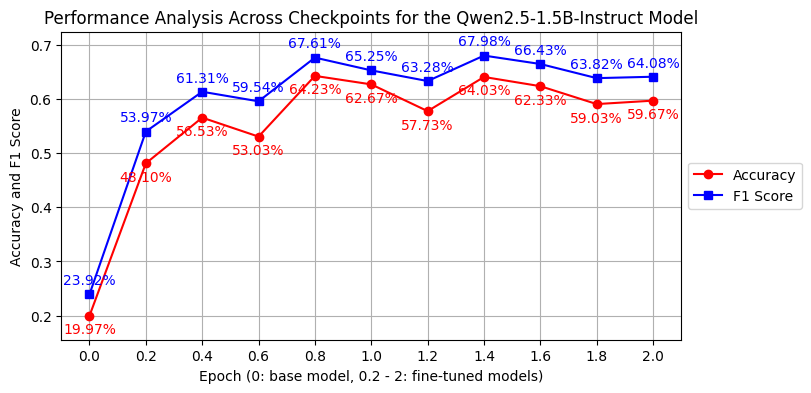

In [23]:
plot_metrics(perf_df, model_name, offset=0.02)

In [24]:
perf_df.to_csv(metrics_csv, index=False)

In [25]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['Qwen/Qwen2.5-1.5B-Instruct/shots-00', 'Qwen/Qwen2.5-1.5B-Instruct/shots-05', 'Qwen/Qwen2.5-1.5B-Instruct/shots-10', 'Qwen/Qwen2.5-1.5B-Instruct/shots-20', 'Qwen/Qwen2.5-1.5B-Instruct/shots-30', 'Qwen/Qwen2.5-1.5B-Instruct/shots-40', 'Qwen/Qwen2.5-1.5B-Instruct/shots-50']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:478: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

shots                  model                                  run  accuracy  \
0     0  Qwen2.5-1.5B-Instruct  Qwen/Qwen2.5-1.5B-Instruct/shots-00  0.199667   
1     5  Qwen2.5-1.5B-Instruct  Qwen/Qwen2.5-1.5B-Instruct/shots-05  0.391333   
2    10  Qwen2.5-1.5B-Instruct  Qwen/Qwen2.5-1.5B-Instruct/shots-10  0.405000   
3    20  Qwen2.5-1.5B-Instruct  Qwen/Qwen2.5-1.5B-Instruct/shots-20  0.228000   
4    30  Qwen2.5-1.5B-Instruct  Qwen/Qwen2.5-1.5B-Instruct/shots-30  0.230333   
5    40  Qwen2.5-1.5B-Instruct  Qwen/Qwen2.5-1.5B-Instruct/shots-40  0.292000   
6    50  Qwen2.5-1.5B-Instruct  Qwen/Qwen2.5-1.5B-Instruct/shots-50  0.287667   

   precision    recall        f1  ratio_valid_classifications  
0   0.527996  0.199667  0.239190                     0.922333  
1   0.590641  0.391333  0.438738                     0.828333  
2   0.588645  0.405000  0.460590                     0.915667  
3   0.525511  0.228000  0.303866                     0.676000  
4   0.553686  0.230333  0.306713                     0.661000  
5   0.566742  0.292000  0.375496                     0.520667  
6   0.566021  0.287667  0.366274                     0.460333

0: Qwen/Qwen2.5-1.5B-Instruct/shots-00
5: Qwen/Qwen2.5-1.5B-Instruct/shots-05
10: Qwen/Qwen2.5-1.5B-Instruct/shots-10
20: Qwen/Qwen2.5-1.5B-Instruct/shots-20
30: Qwen/Qwen2.5-1.5B-Instruct/shots-30
40: Qwen/Qwen2.5-1.5B-Instruct/shots-40
50: Qwen/Qwen2.5-1.5B-Instruct/shots-50


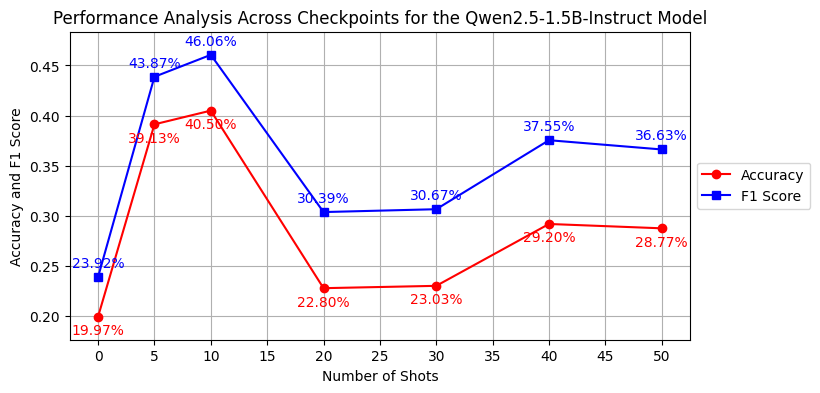

In [26]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [27]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** Qwen/Qwen2.5-1.5B-Instruct/shots-00 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-00
问法错误       1339
不是         1068
不重要         229
是           115
问法错误。       101
不是。          86
回答正确。        19
回答正确         16
是。           15
回答: 不重要       7
回答: 是         2
回答：不是         1
回答: 是。        1
回答：是          1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38382 (\N{CJK UNIFIED IDEOGRAPH-95EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

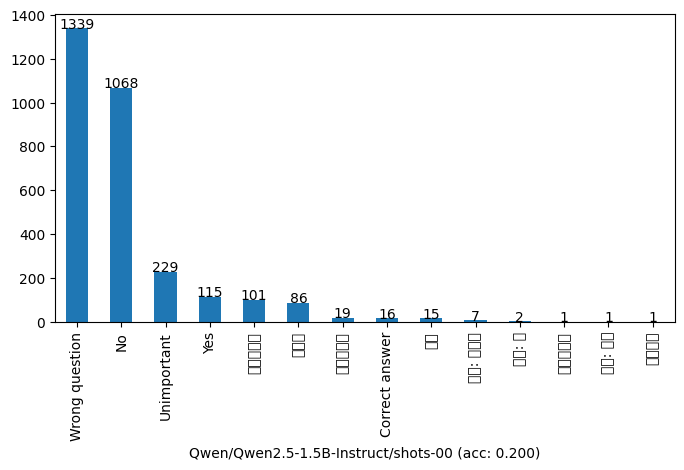

********** Qwen/Qwen2.5-1.5B-Instruct/shots-05 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-05
不是         1170
不重要         715
问法错误        332
是           268
回答: 不是      210
回答: 是       199
回答: 不重要     106
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

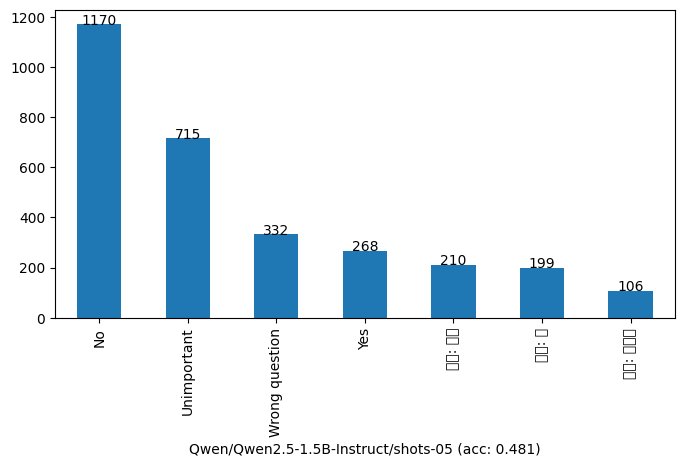

********** Qwen/Qwen2.5-1.5B-Instruct/shots-10 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-10
不是          1237
不重要          604
问法错误         458
是            448
回答: 是        151
回答: 不是        63
回答: 不重要       38
回答: 问法错误       1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

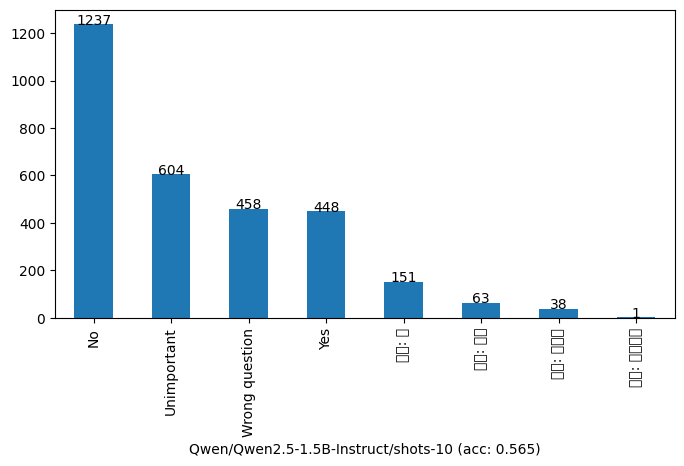

********** Qwen/Qwen2.5-1.5B-Instruct/shots-20 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-20
问法错误           1534
回答: 是           439
回答: 不是          422
不重要             227
不是              222
回答: 不重要         106
是                45
回答: 问法错误          3
回答: 是为了纪念爷爷       1
回答: 回答正确          1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

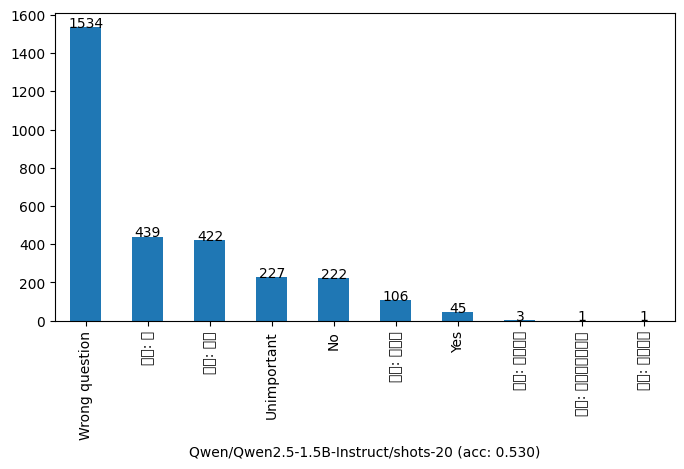

********** Qwen/Qwen2.5-1.5B-Instruct/shots-30 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-30
问法错误                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

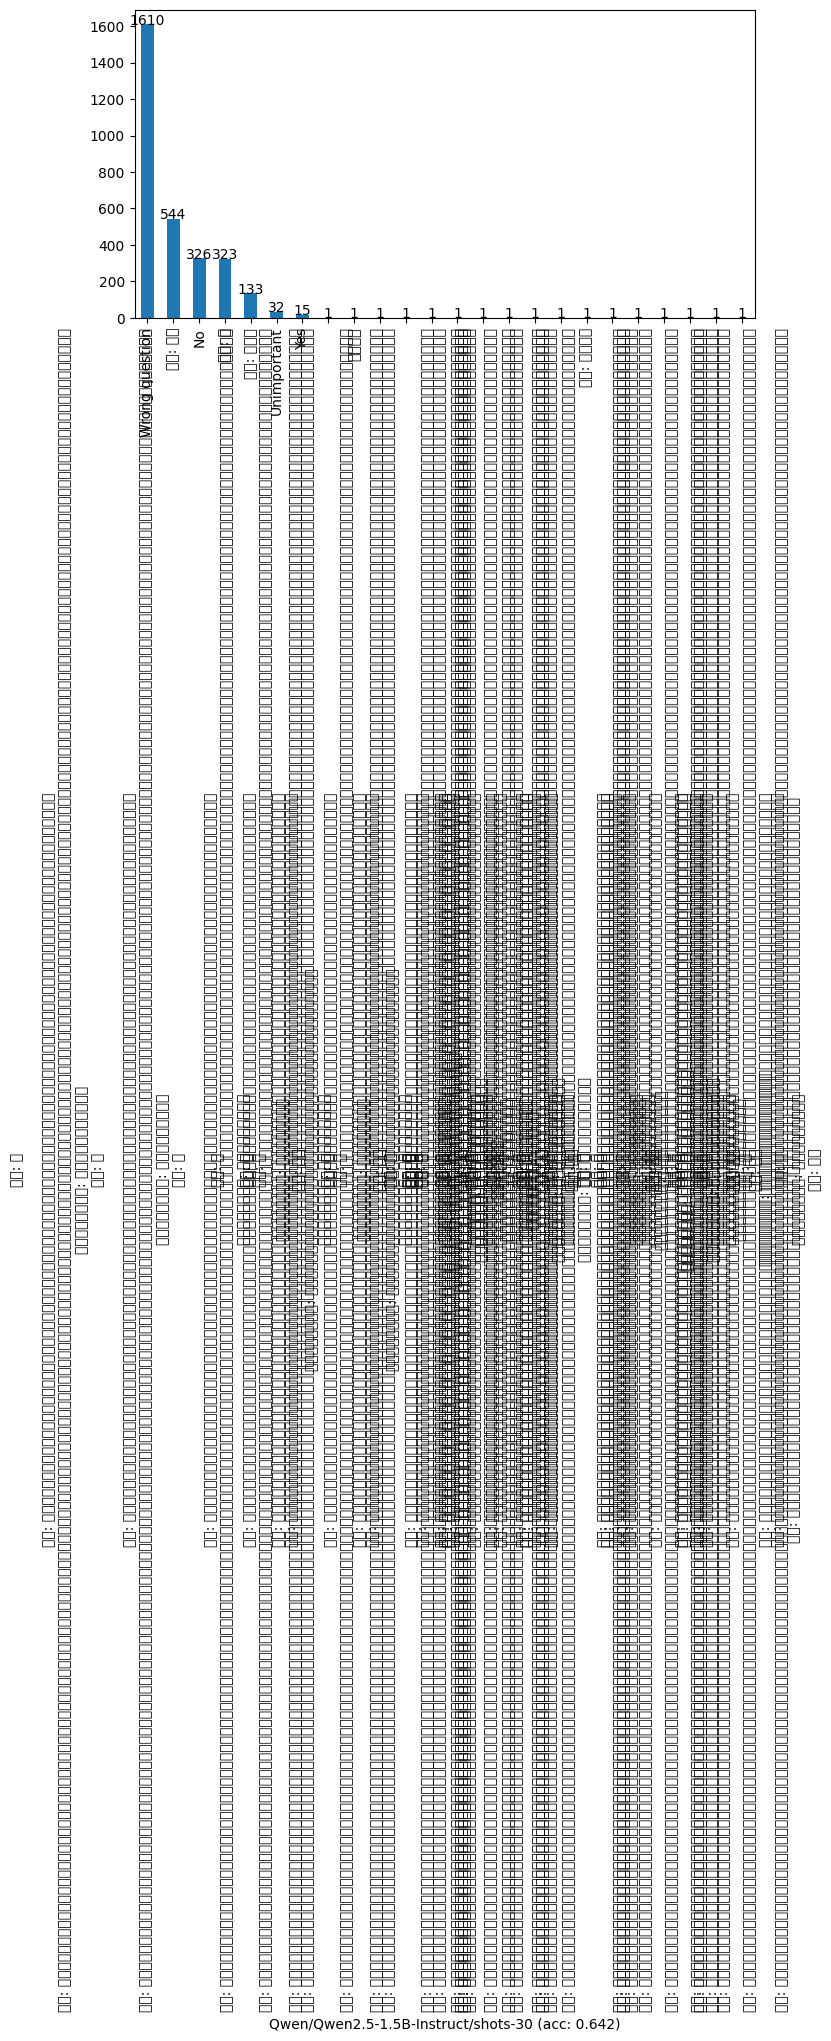

********** Qwen/Qwen2.5-1.5B-Instruct/shots-40 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-40
问法错误                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

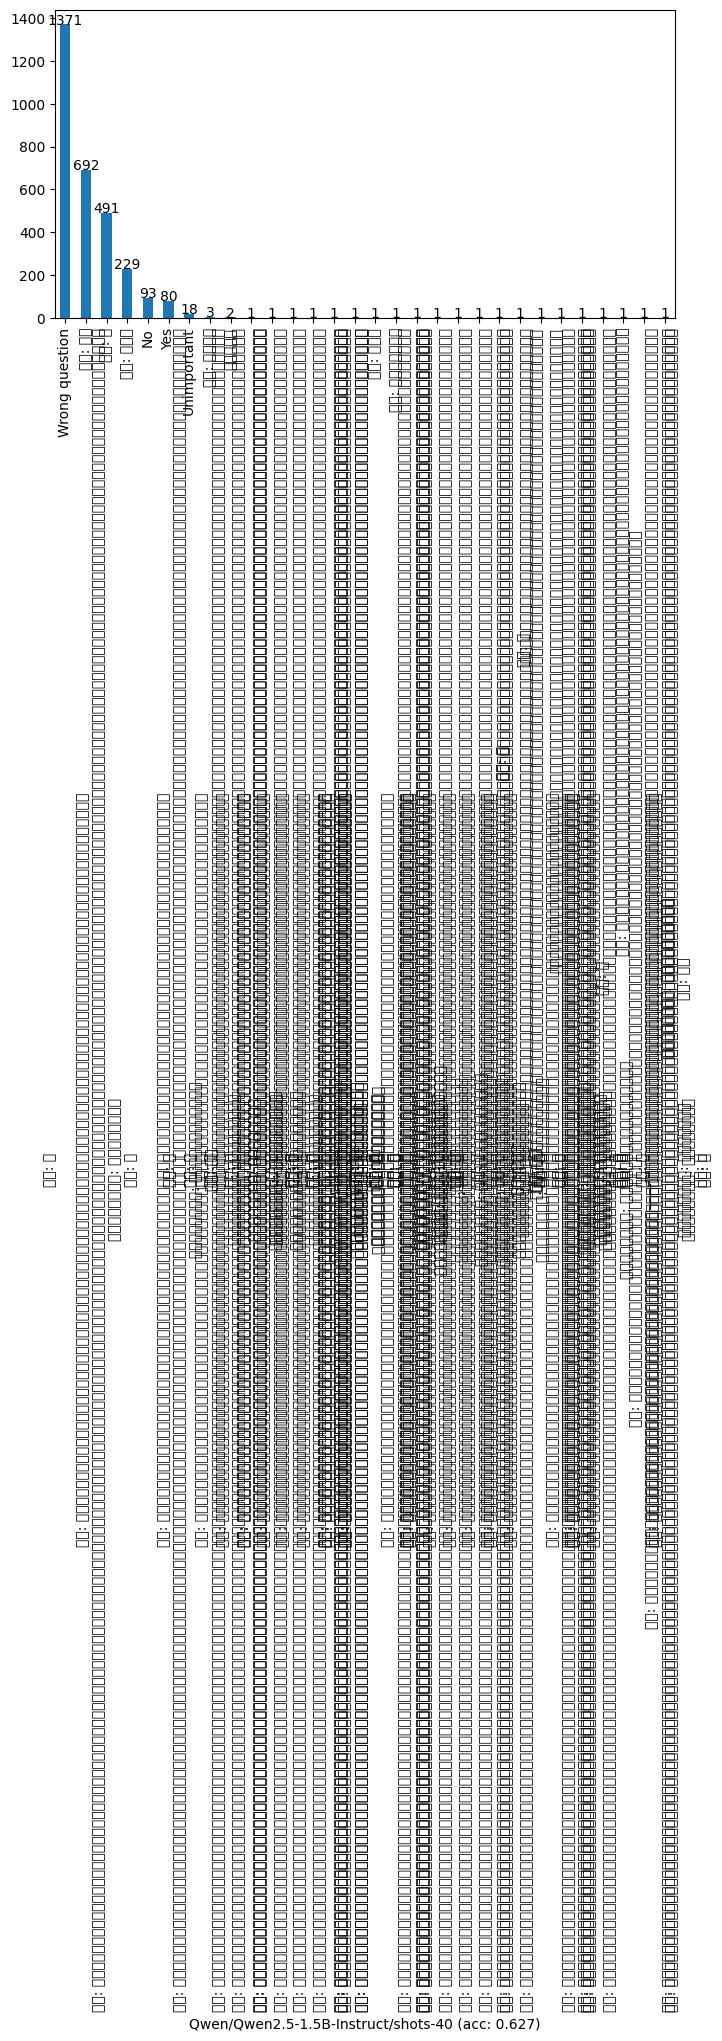

********** Qwen/Qwen2.5-1.5B-Instruct/shots-50 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-50
问法错误                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

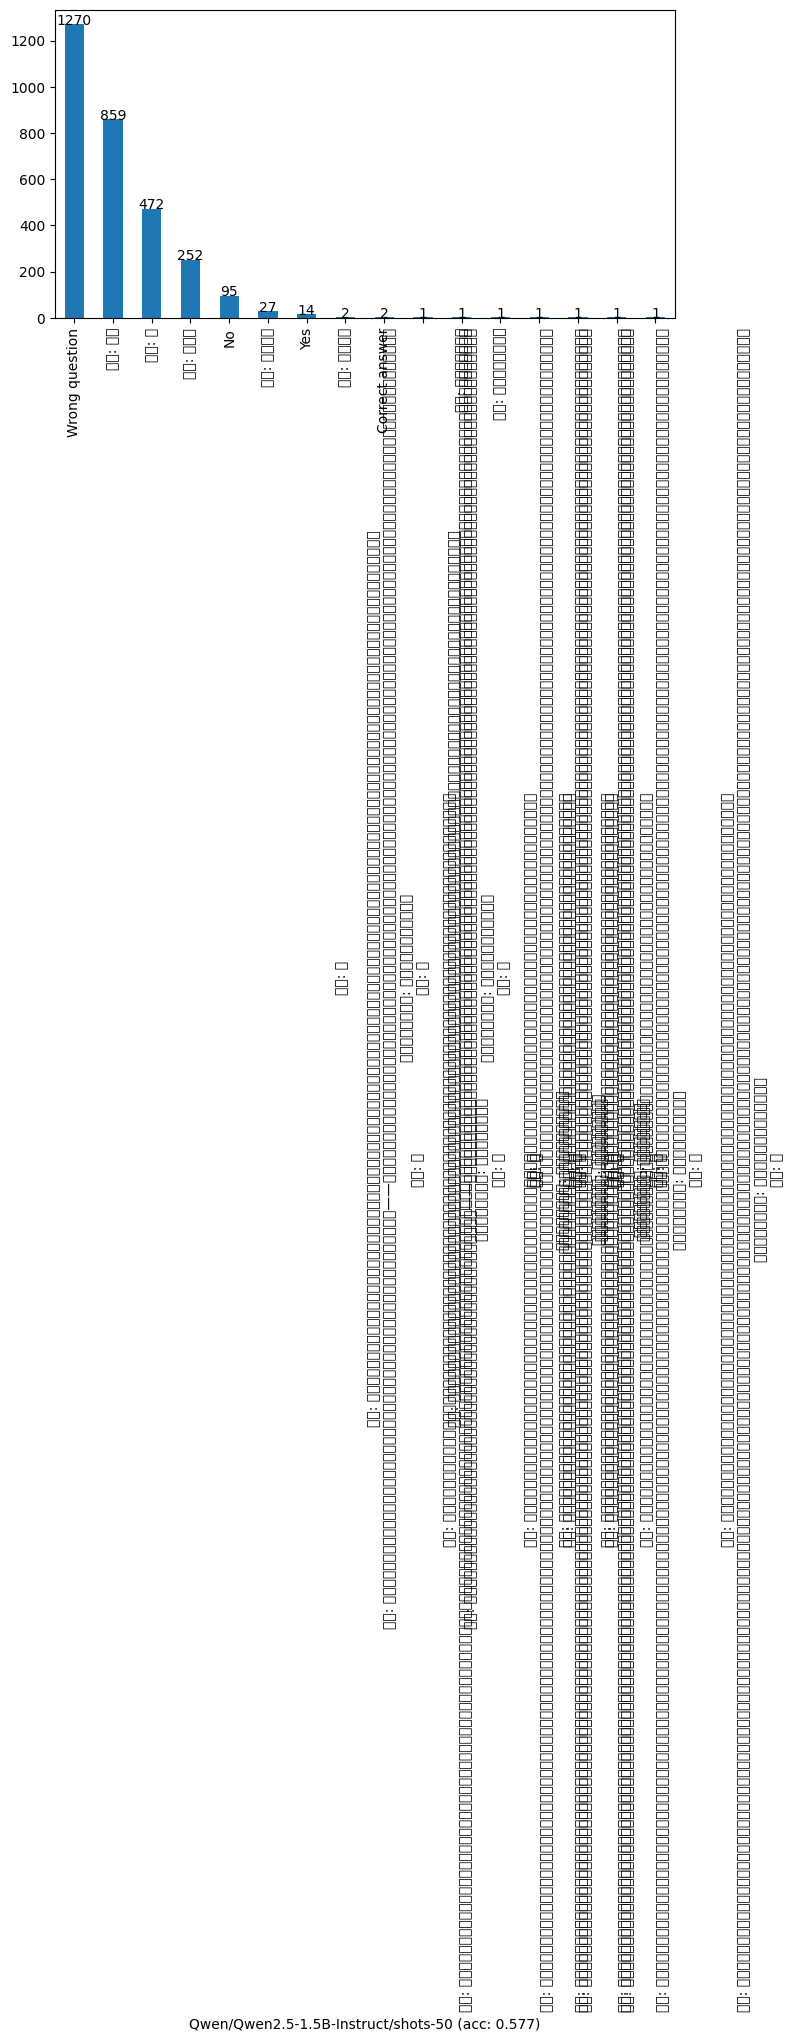

********** Qwen/Qwen2.5-1.5B-Instruct_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct_torch.float16_lf
问法错误       1339
不是         1068
不重要         229
是           115
问法错误。       101
不是。          86
回答正确。        19
回答正确         16
是。           15
回答: 不重要       7
回答: 是         2
回答：不是         1
回答: 是。        1
回答：是          1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38382 (\N{CJK UNIFIED IDEOGRAPH-95EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

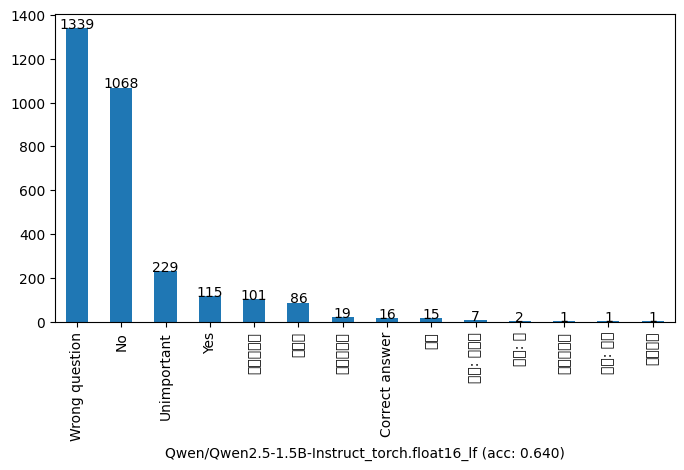

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-35_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-35_torch.float16_lf
不是      1241
不重要      969
是        704
回答正确      56
问法错误      29
重要         1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


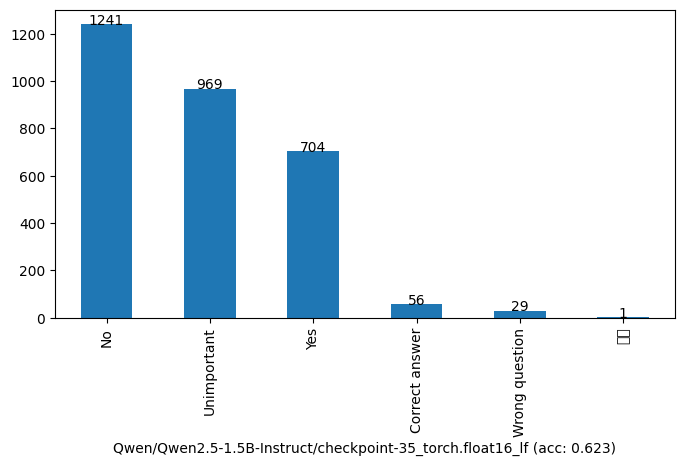

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-70_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-70_torch.float16_lf
不是      1360
不重要      808
是        773
回答正确      51
问法错误       7
重要         1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


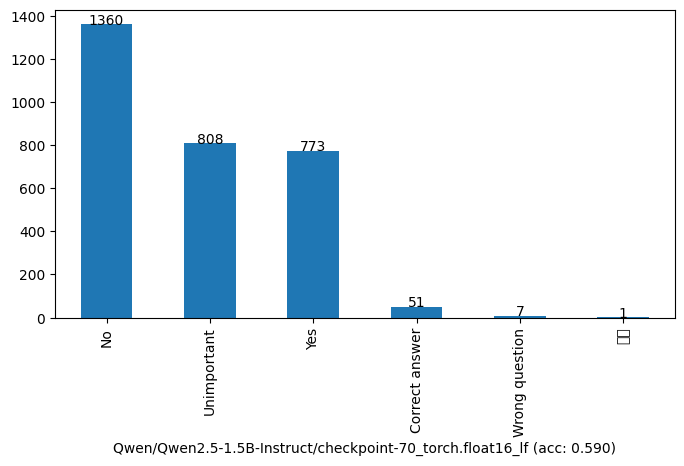

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-105_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-105_torch.float16_lf
不是      1117
不重要      993
是        803
问法错误      44
回答正确      43
Name: count, dtype: int64


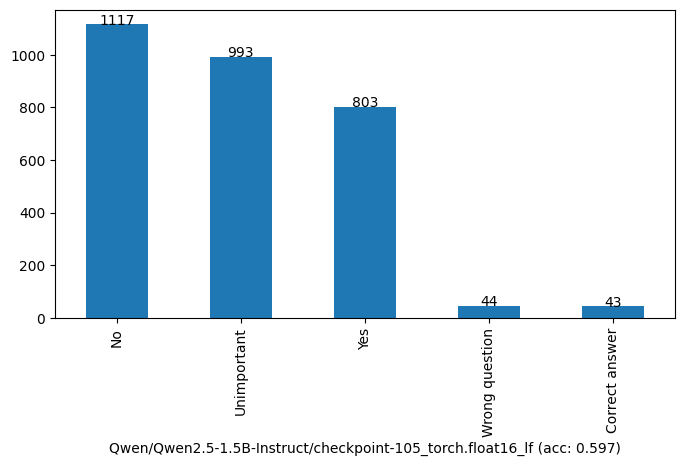

In [28]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** Qwen/Qwen2.5-1.5B-Instruct/shots-00 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-00
问法错误       1339
不是         1068
不重要         229
是           115
问法错误。       101
不是。          86
回答正确。        19
回答正确         16
是。           15
回答: 不重要       7
回答: 是         2
回答：不是         1
回答: 是。        1
回答：是          1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logi

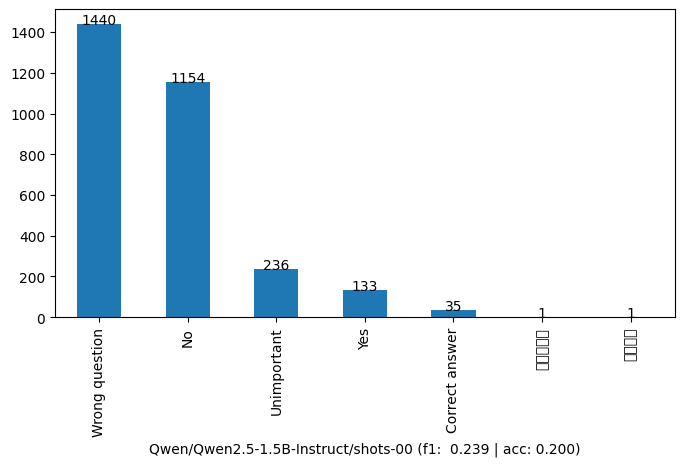

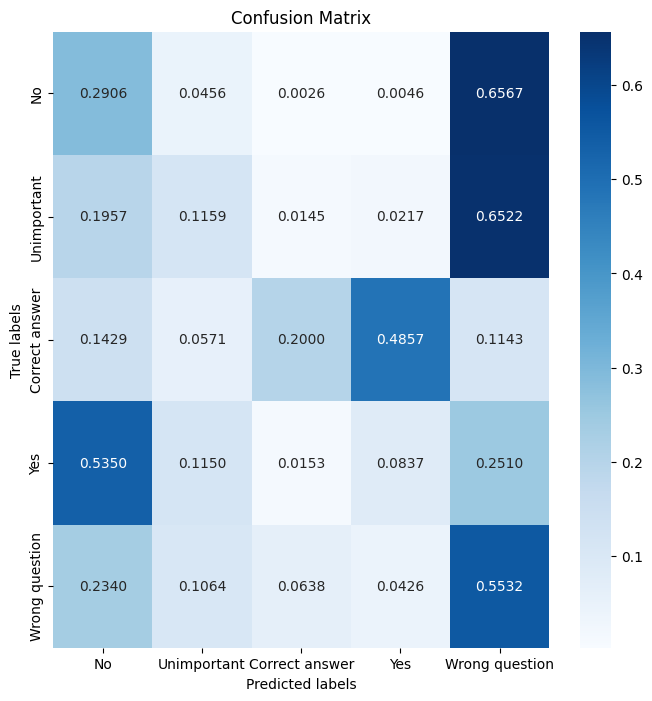

********** Qwen/Qwen2.5-1.5B-Instruct/shots-05 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-05
不是         1170
不重要         715
问法错误        332
是           268
回答: 不是      210
回答: 是       199
回答: 不重要     106
Name: count, dtype: int64


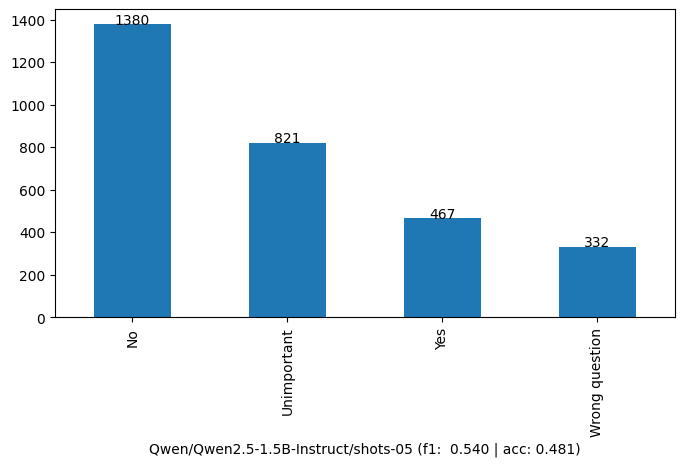

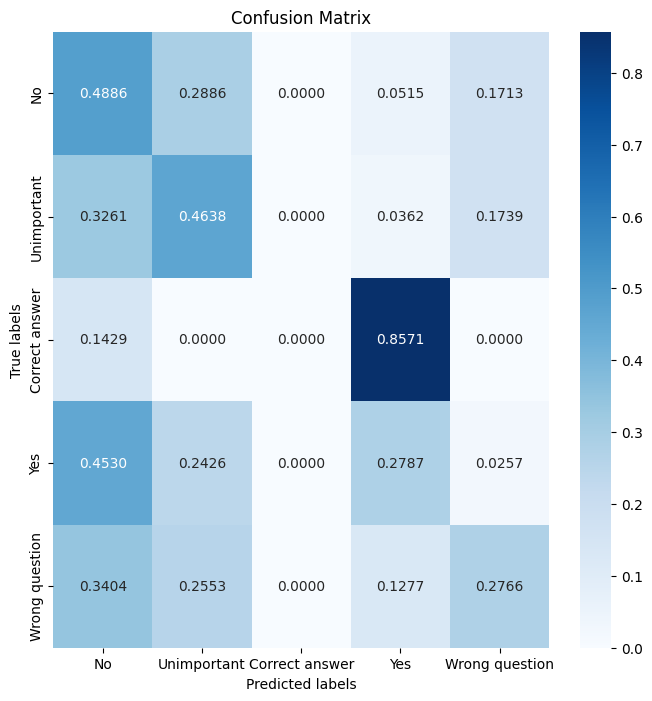

********** Qwen/Qwen2.5-1.5B-Instruct/shots-10 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-10
不是          1237
不重要          604
问法错误         458
是            448
回答: 是        151
回答: 不是        63
回答: 不重要       38
回答: 问法错误       1
Name: count, dtype: int64


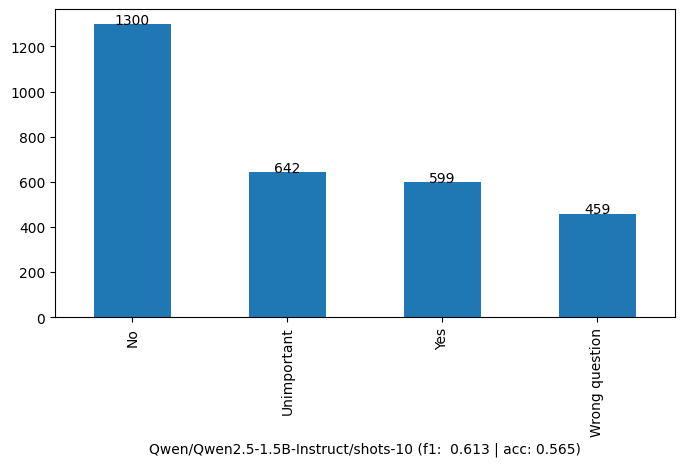

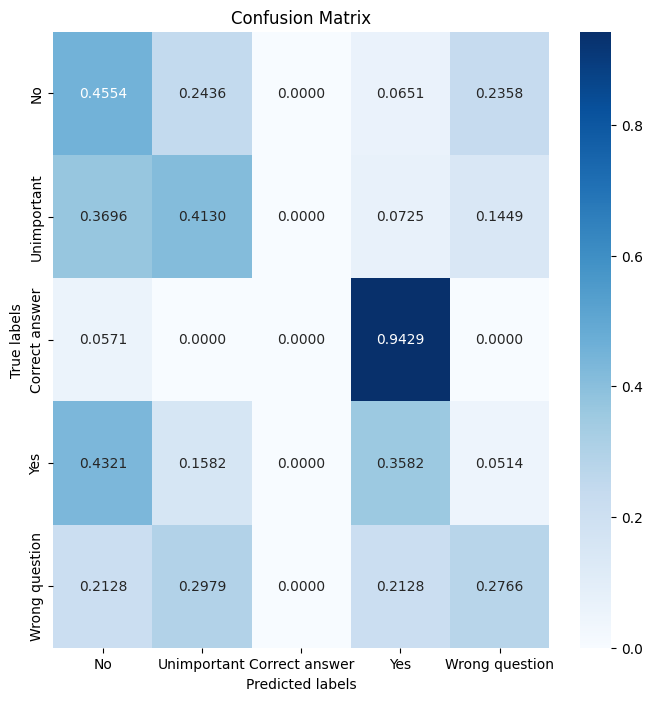

********** Qwen/Qwen2.5-1.5B-Instruct/shots-20 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-20
问法错误           1534
回答: 是           439
回答: 不是          422
不重要             227
不是              222
回答: 不重要         106
是                45
回答: 问法错误          3
回答: 是为了纪念爷爷       1
回答: 回答正确          1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32426 (\N{CJK UNIFIED IDEOGRAPH-7EAA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

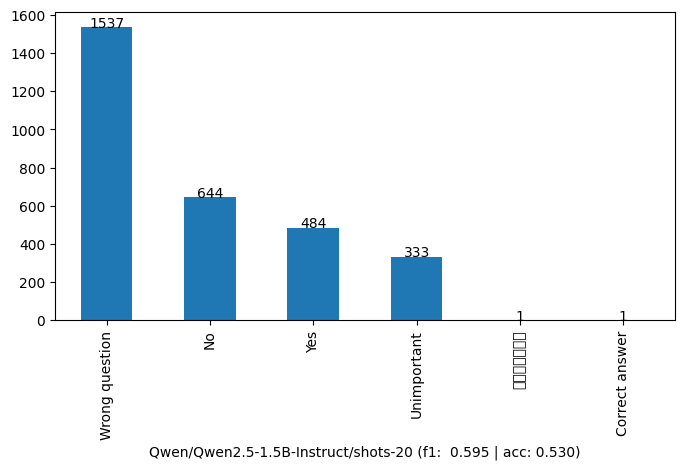

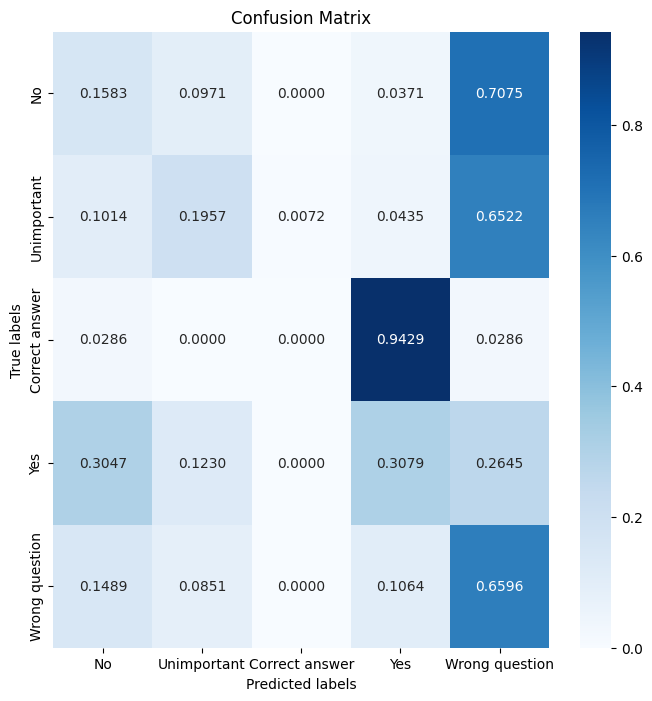

********** Qwen/Qwen2.5-1.5B-Instruct/shots-30 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-30
问法错误                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


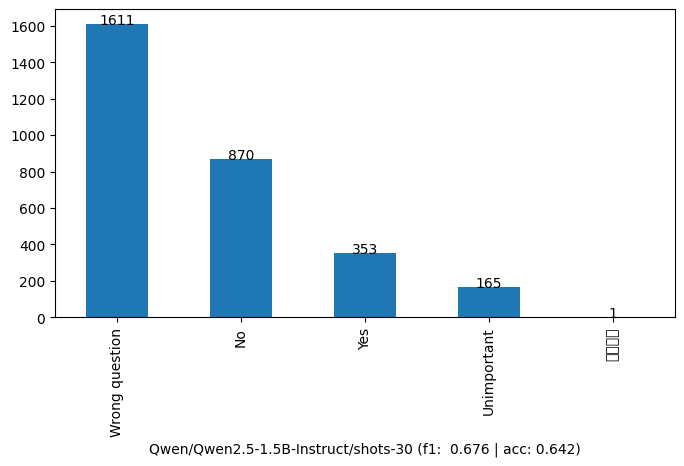

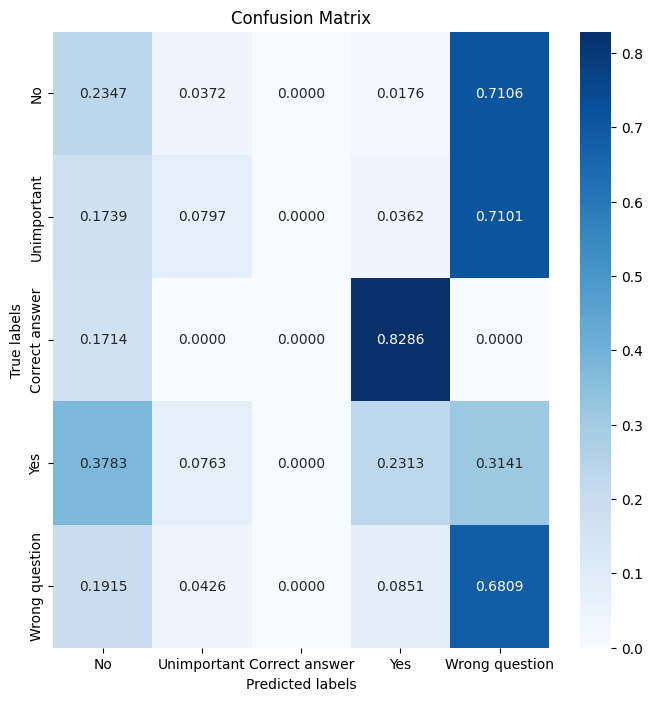

********** Qwen/Qwen2.5-1.5B-Instruct/shots-40 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-40
问法错误                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

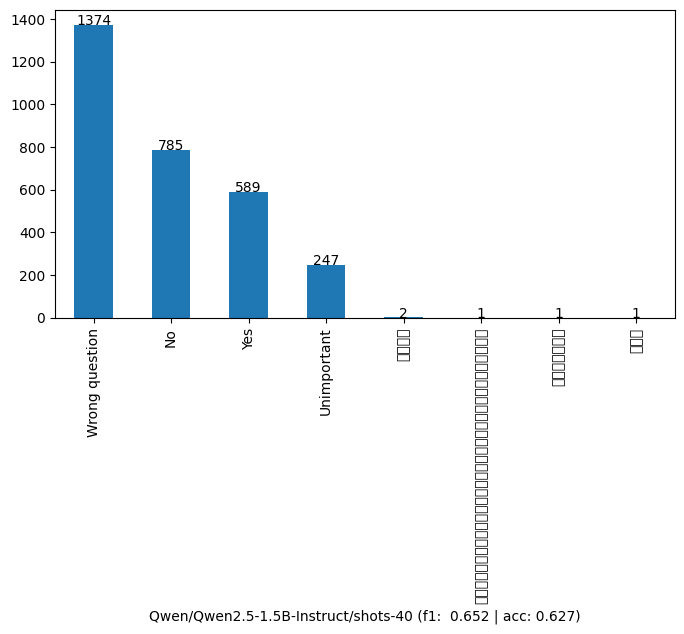

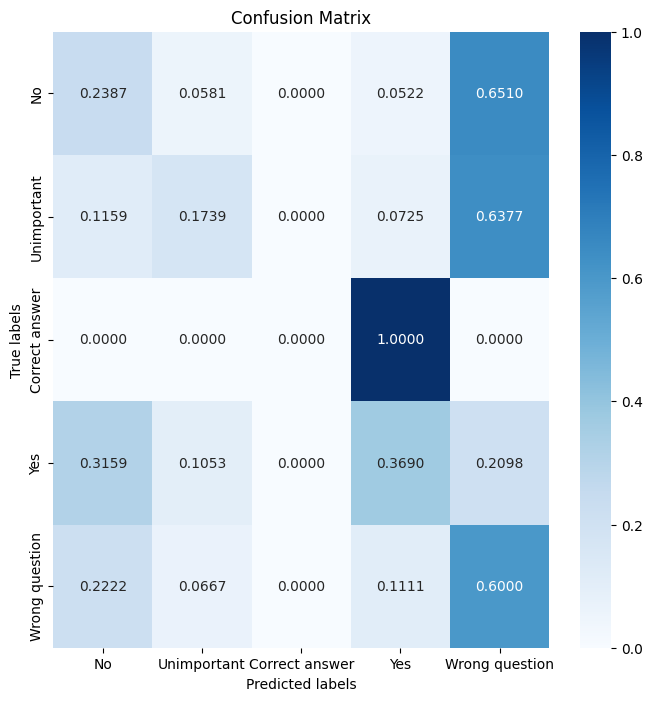

********** Qwen/Qwen2.5-1.5B-Instruct/shots-50 **********
Qwen/Qwen2.5-1.5B-Instruct/shots-50
问法错误                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20102 (\N{CJK UNIFIED IDEOGRAPH-4E86}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

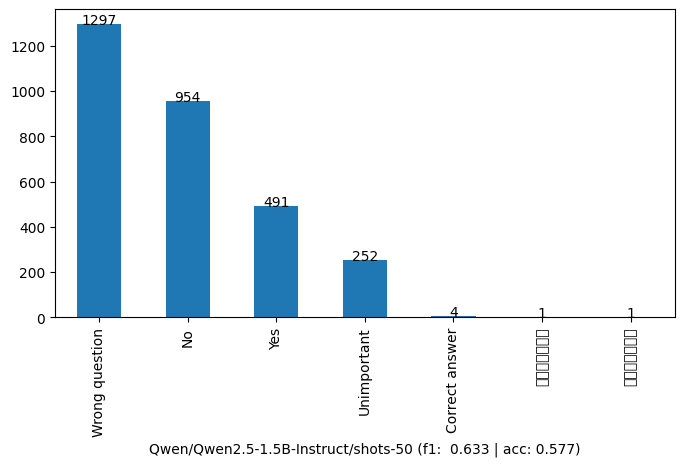

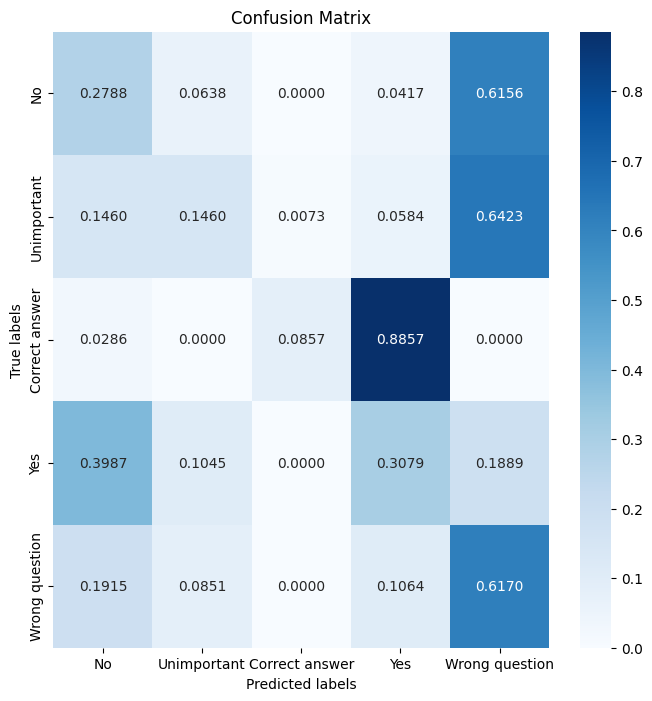

********** Qwen/Qwen2.5-1.5B-Instruct_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct_torch.float16_lf
问法错误       1339
不是         1068
不重要         229
是           115
问法错误。       101
不是。          86
回答正确。        19
回答正确         16
是。           15
回答: 不重要       7
回答: 是         2
回答：不是         1
回答: 是。        1
回答：是          1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logi

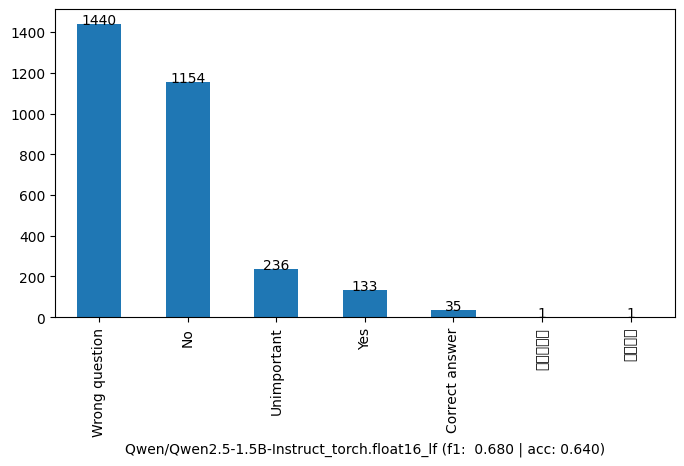

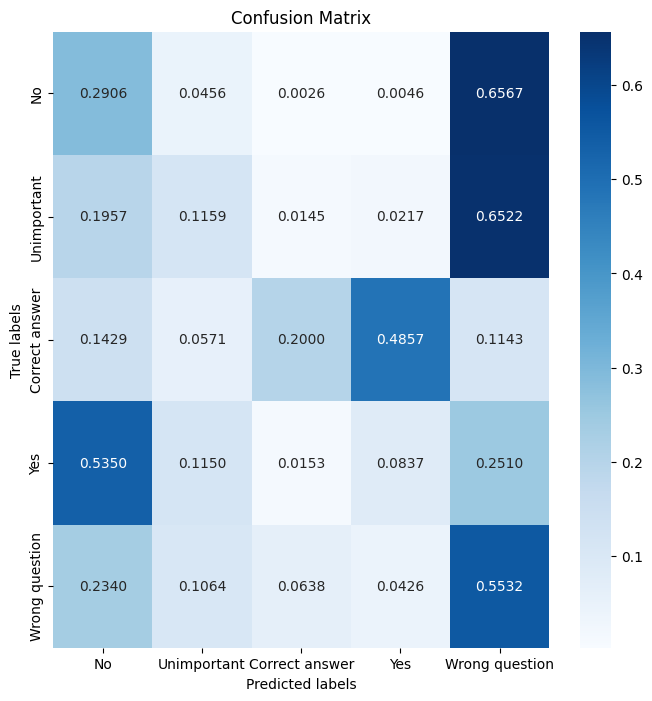

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-35_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-35_torch.float16_lf
不是      1241
不重要      969
是        704
回答正确      56
问法错误      29
重要         1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


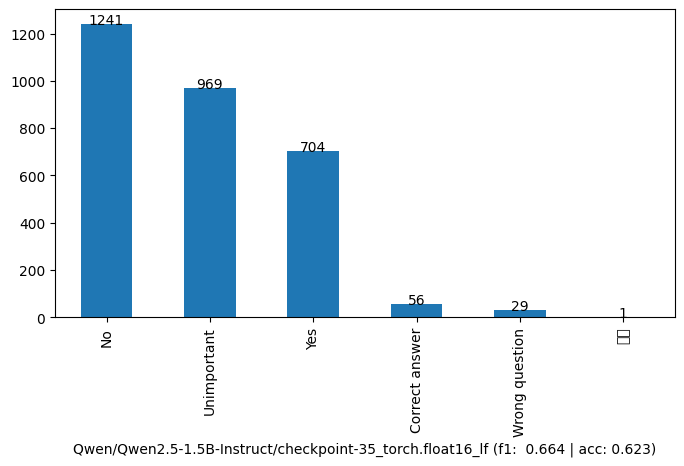

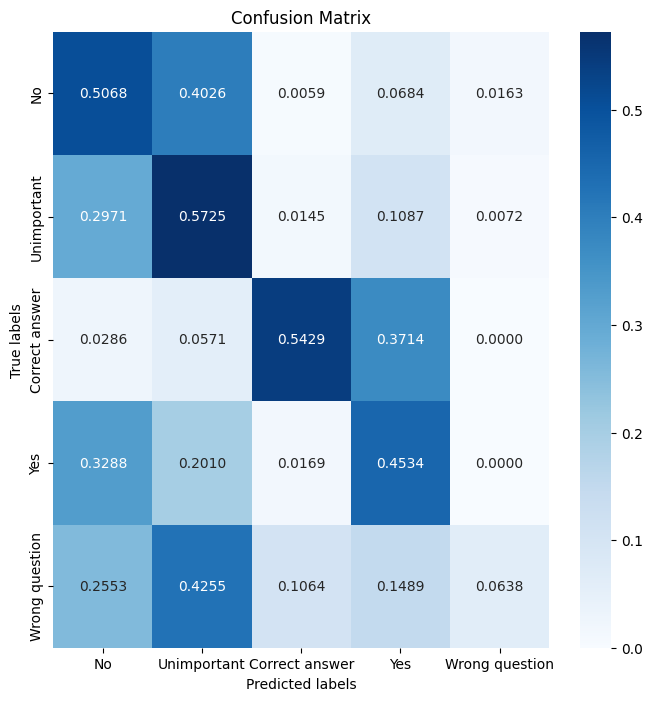

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-70_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-70_torch.float16_lf
不是      1360
不重要      808
是        773
回答正确      51
问法错误       7
重要         1
Name: count, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


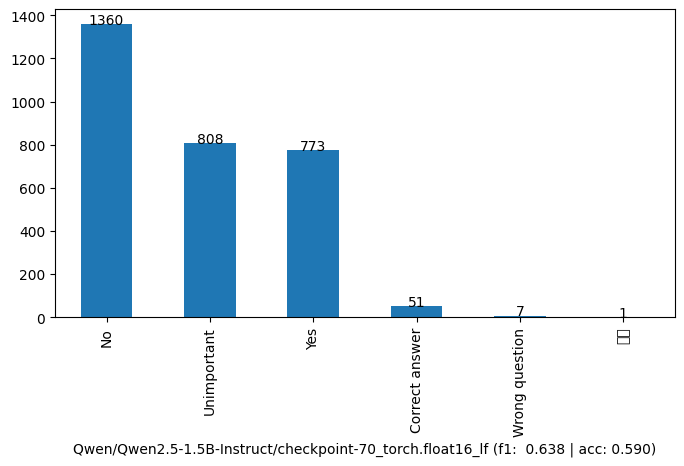

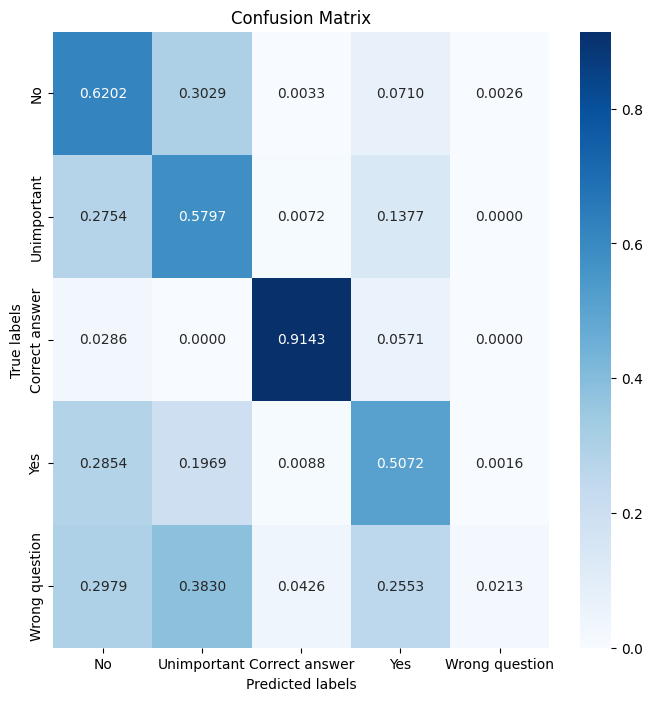

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-105_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-105_torch.float16_lf
不是      1117
不重要      993
是        803
问法错误      44
回答正确      43
Name: count, dtype: int64


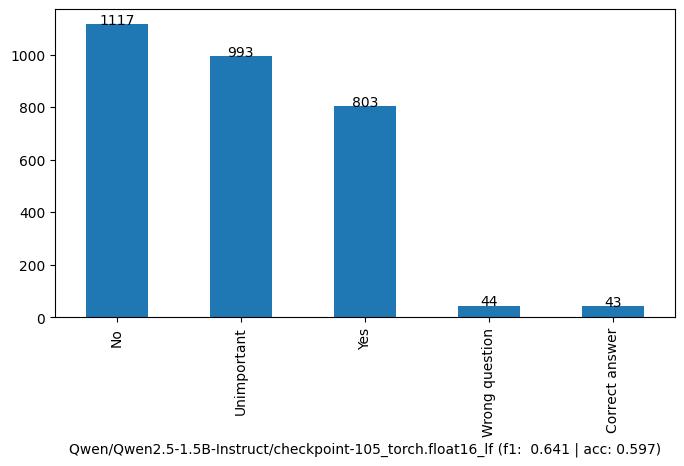

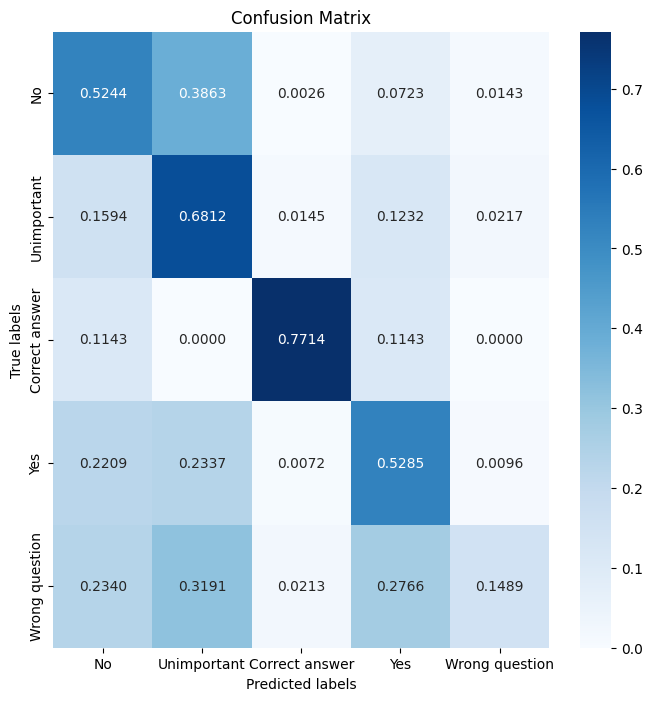

In [29]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-140_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-140_torch.float16_lf
不是      1422
是        941
不重要      547
回答正确      48
问法错误      42
Name: count, dtype: int64


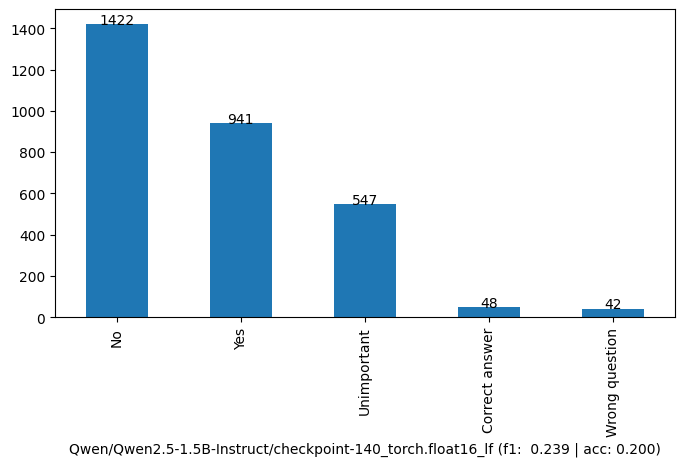

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-175_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-175_torch.float16_lf
不是      1604
是        789
不重要      489
问法错误      71
回答正确      47
Name: count, dtype: int64


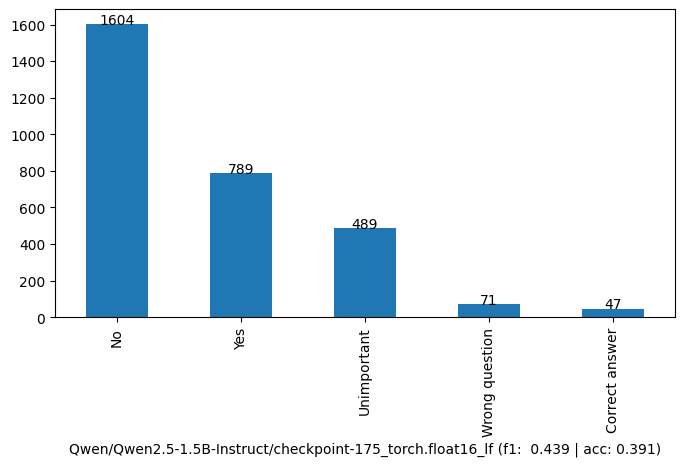

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-210_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-210_torch.float16_lf
不是      1234
是        861
不重要      772
问法错误      89
回答正确      44
Name: count, dtype: int64


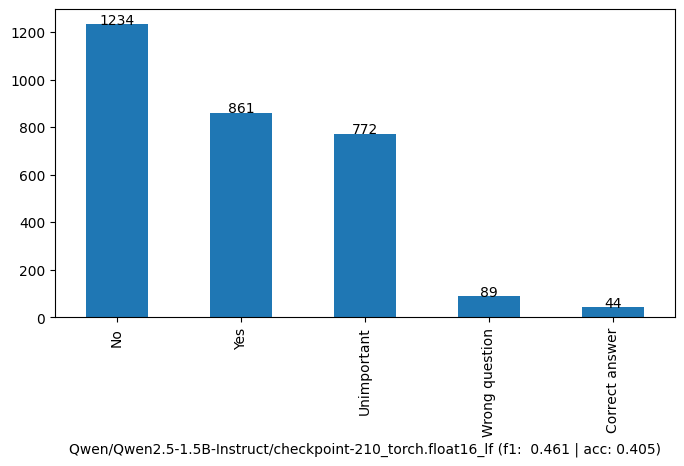

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-245_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-245_torch.float16_lf
不是      1404
是        897
不重要      629
问法错误      36
回答正确      34
Name: count, dtype: int64


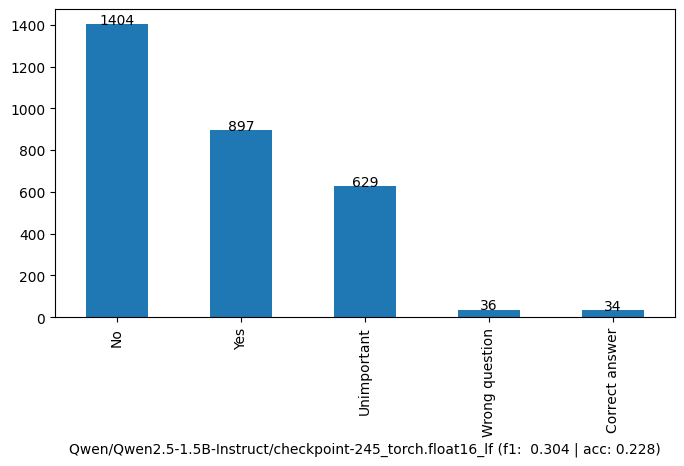

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-280_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-280_torch.float16_lf
不是      1404
是        852
不重要      653
问法错误      54
回答正确      37
Name: count, dtype: int64


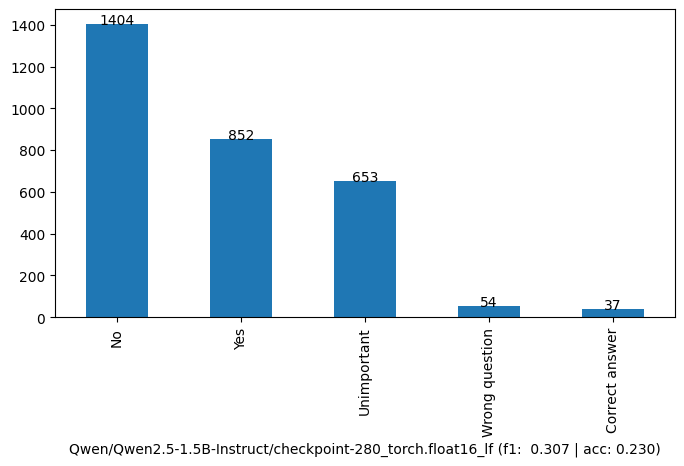

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-315_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-315_torch.float16_lf
不是      1361
是        782
不重要      780
回答正确      39
问法错误      38
Name: count, dtype: int64


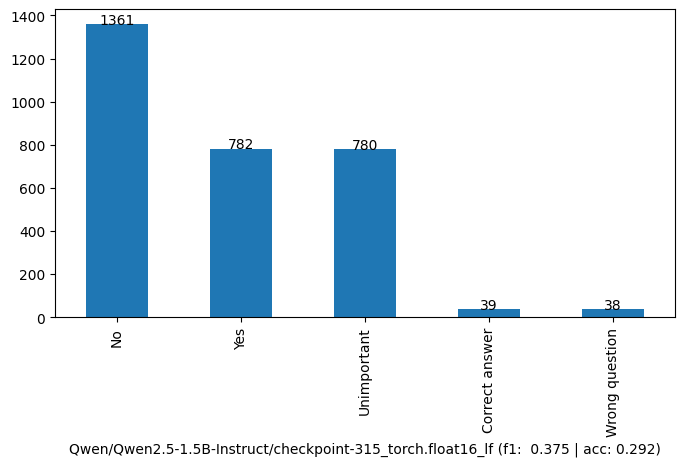

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-350_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-350_torch.float16_lf
不是      1421
是        758
不重要      739
回答正确      42
问法错误      40
Name: count, dtype: int64


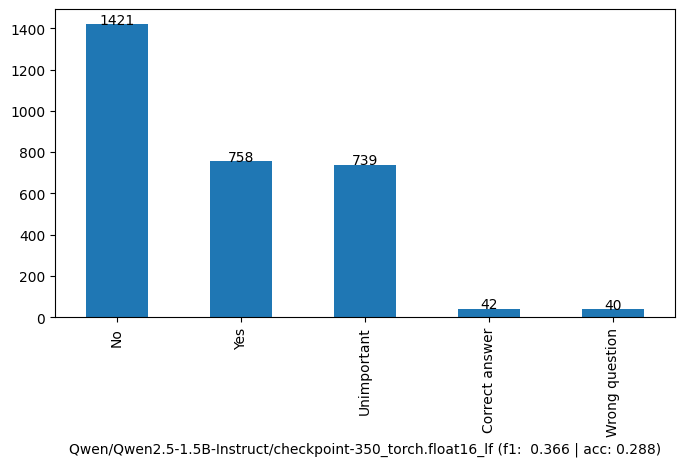

In [30]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
    )

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-140_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-140_torch.float16_lf
不是      1422
是        941
不重要      547
回答正确      48
问法错误      42
Name: count, dtype: int64


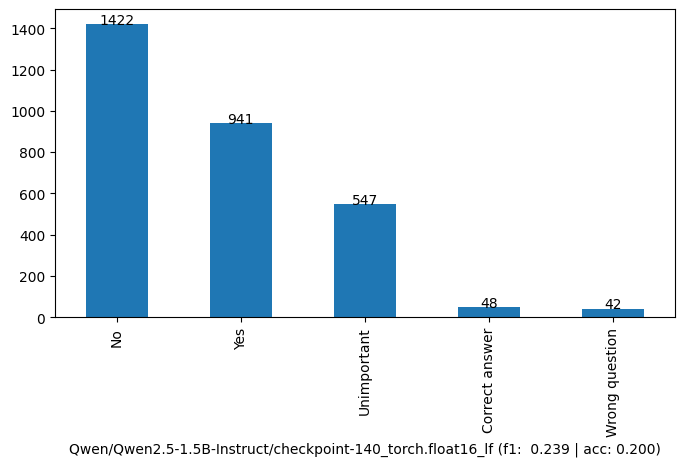

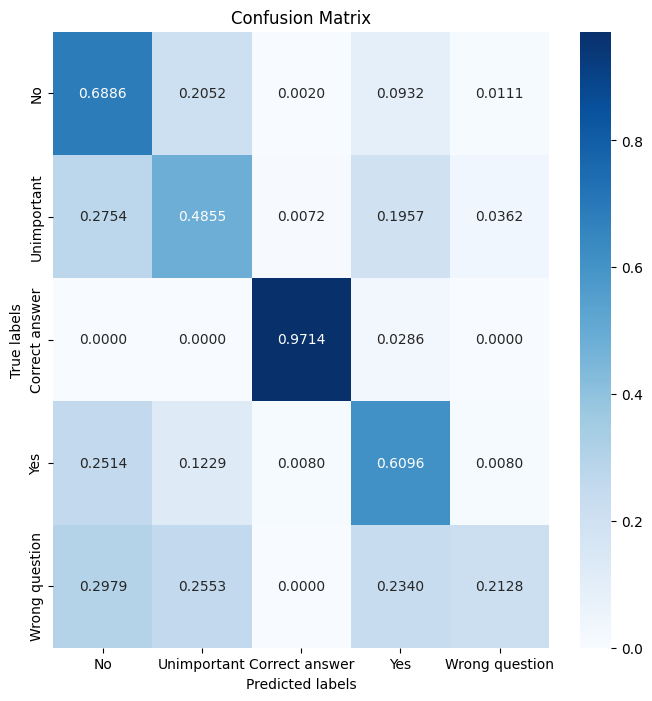

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-175_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-175_torch.float16_lf
不是      1604
是        789
不重要      489
问法错误      71
回答正确      47
Name: count, dtype: int64


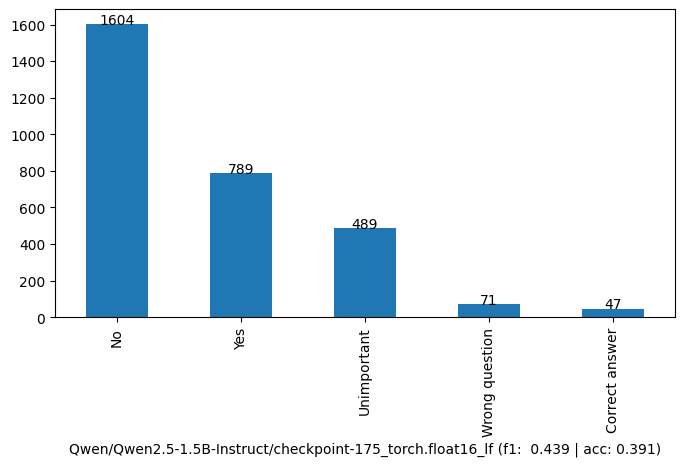

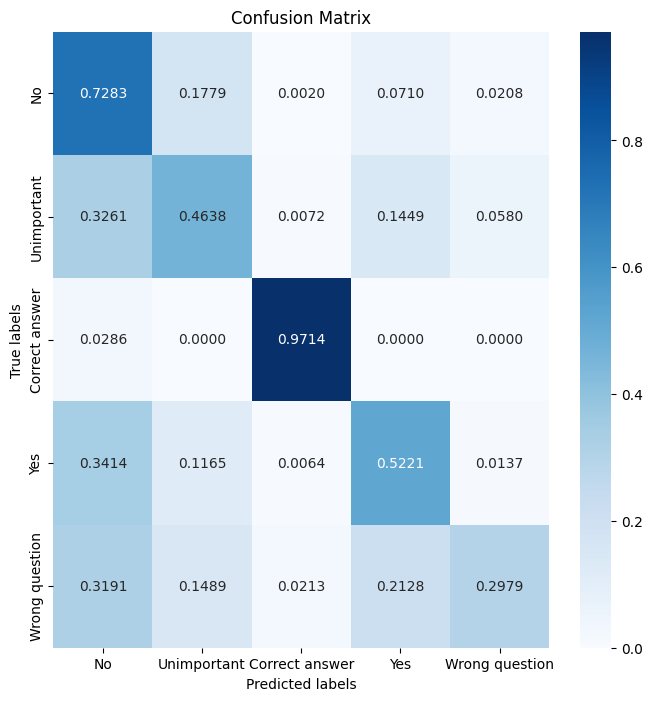

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-210_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-210_torch.float16_lf
不是      1234
是        861
不重要      772
问法错误      89
回答正确      44
Name: count, dtype: int64


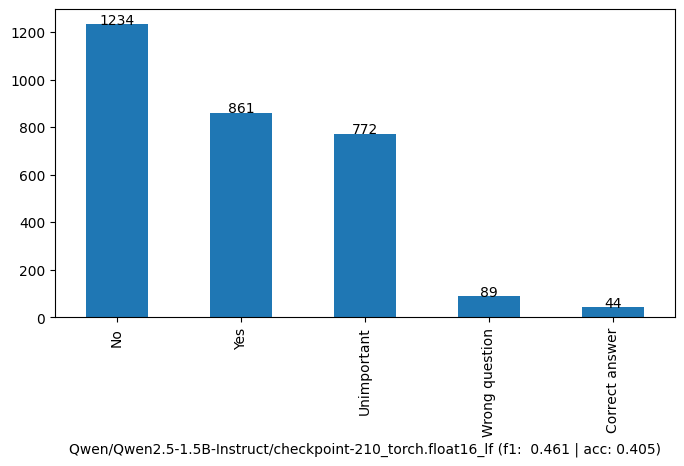

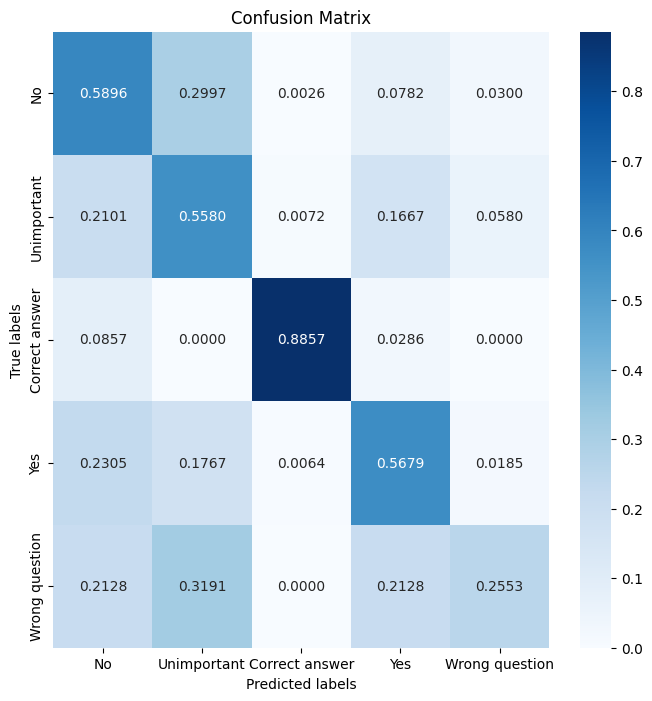

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-245_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-245_torch.float16_lf
不是      1404
是        897
不重要      629
问法错误      36
回答正确      34
Name: count, dtype: int64


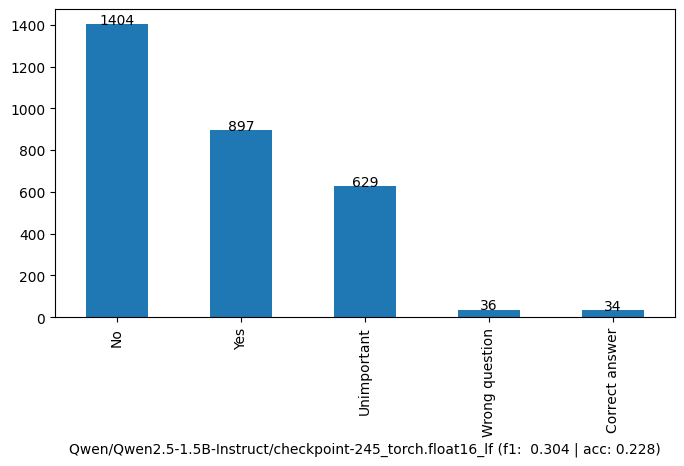

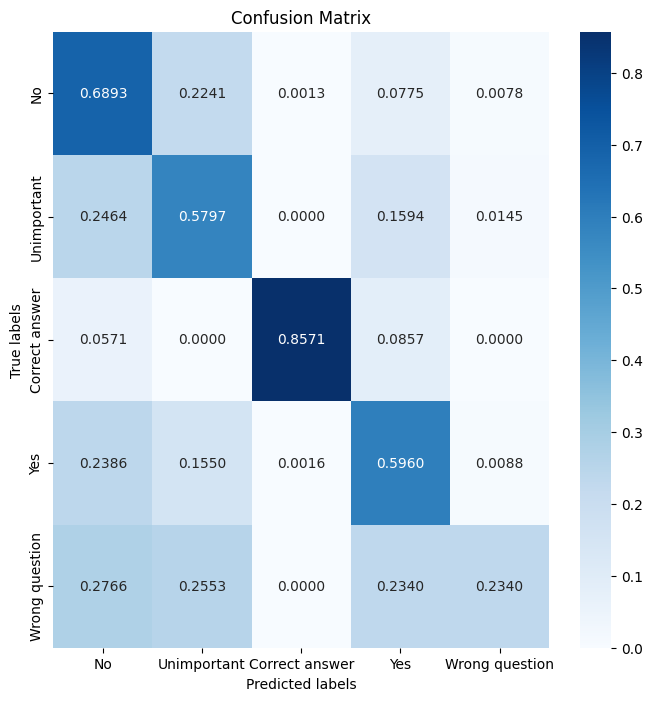

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-280_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-280_torch.float16_lf
不是      1404
是        852
不重要      653
问法错误      54
回答正确      37
Name: count, dtype: int64


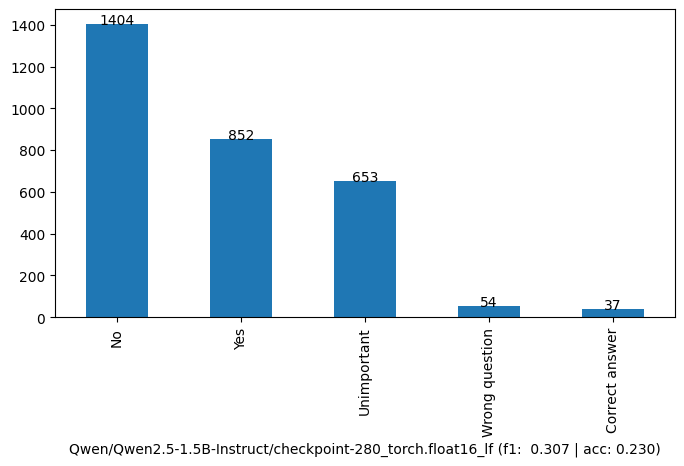

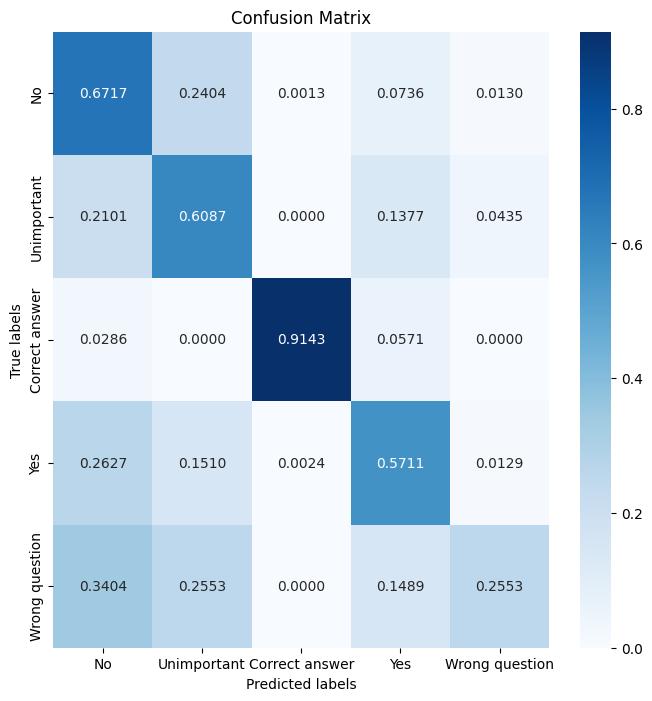

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-315_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-315_torch.float16_lf
不是      1361
是        782
不重要      780
回答正确      39
问法错误      38
Name: count, dtype: int64


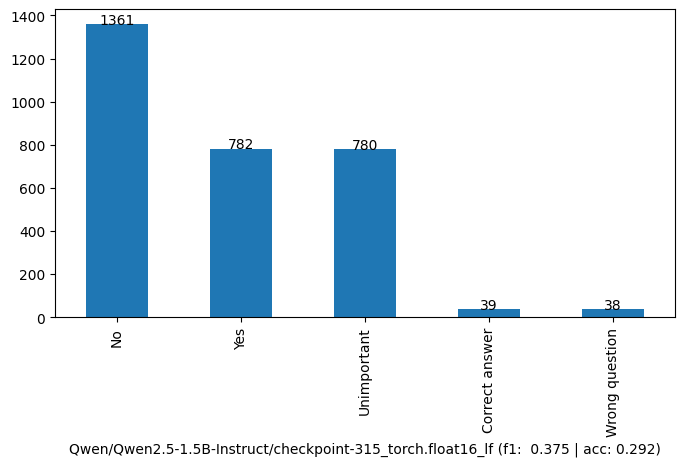

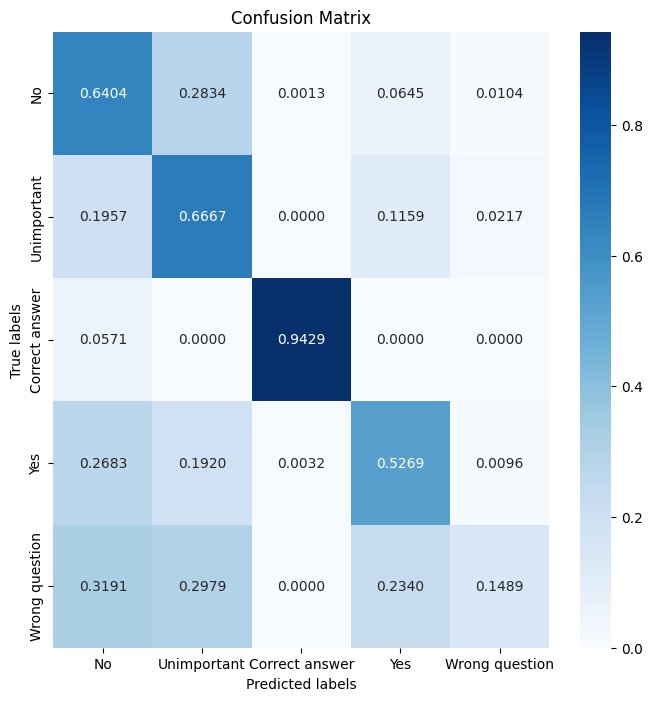

********** Qwen/Qwen2.5-1.5B-Instruct/checkpoint-350_torch.float16_lf **********
Qwen/Qwen2.5-1.5B-Instruct/checkpoint-350_torch.float16_lf
不是      1421
是        758
不重要      739
回答正确      42
问法错误      40
Name: count, dtype: int64


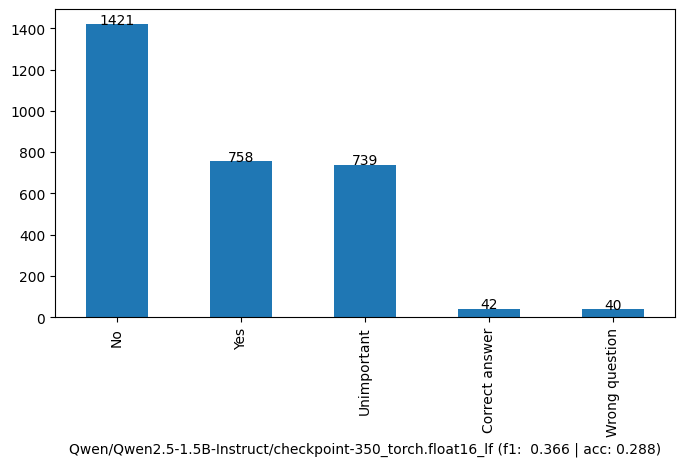

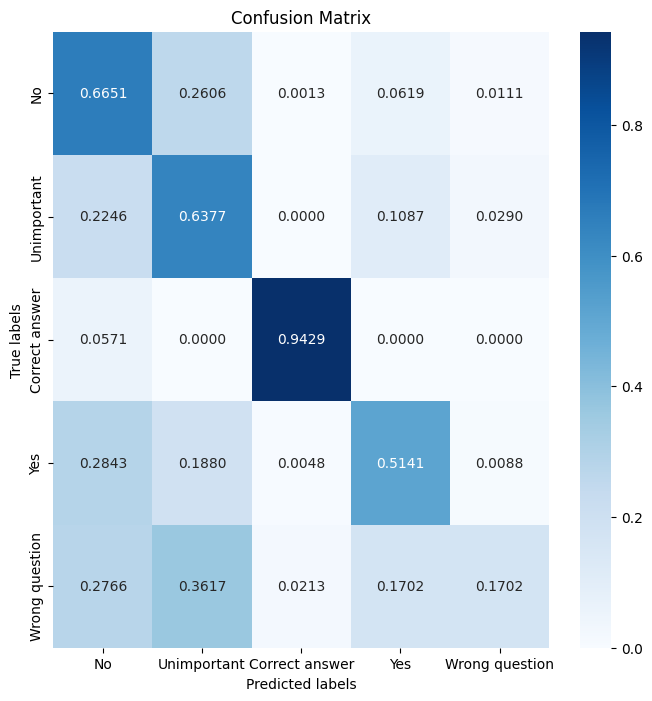

In [31]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )